<a href="https://colab.research.google.com/github/RizaHaryadi2003/iris_dataset_clustering_with_k_means.py/blob/main/iris_dataset_clustering_with_k_means_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import mode

# Atur tema seaborn biar plotnya lebih enak dilihat
sns.set(style="whitegrid")

In [ ]:
# Langkah 1: Muat dan cek dataset Iris
iris = load_iris()
X = iris.data  # Ambil data fitur (150 sampel, 4 fitur)
y = iris.target  # Ambil label kelas (0, 1, 2)
feature_names = iris.feature_names  # Nama fitur
target_names = iris.target_names  # Nama spesies

# Tampilkan deskripsi dataset
print("Sekilas tentang Dataset Iris:")
print(iris.DESCR)

# Buat DataFrame biar gampang dilihat
df = pd.DataFrame(X, columns=feature_names)
df['Spesies'] = [target_names[i] for i in y]
print("\n5 Baris Pertama DataFrame Iris:")
print(df.head())

Sekilas tentang Dataset Iris:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33

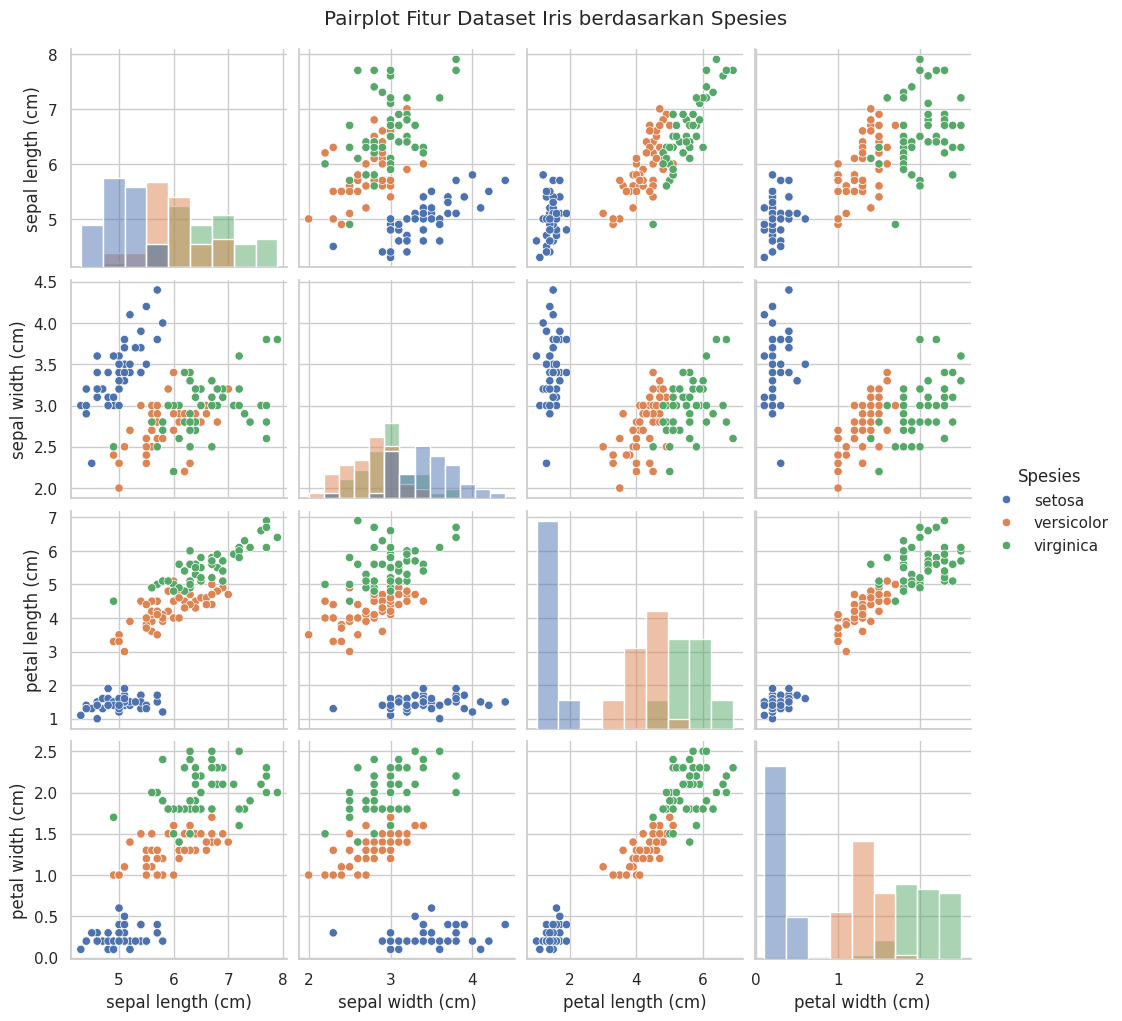

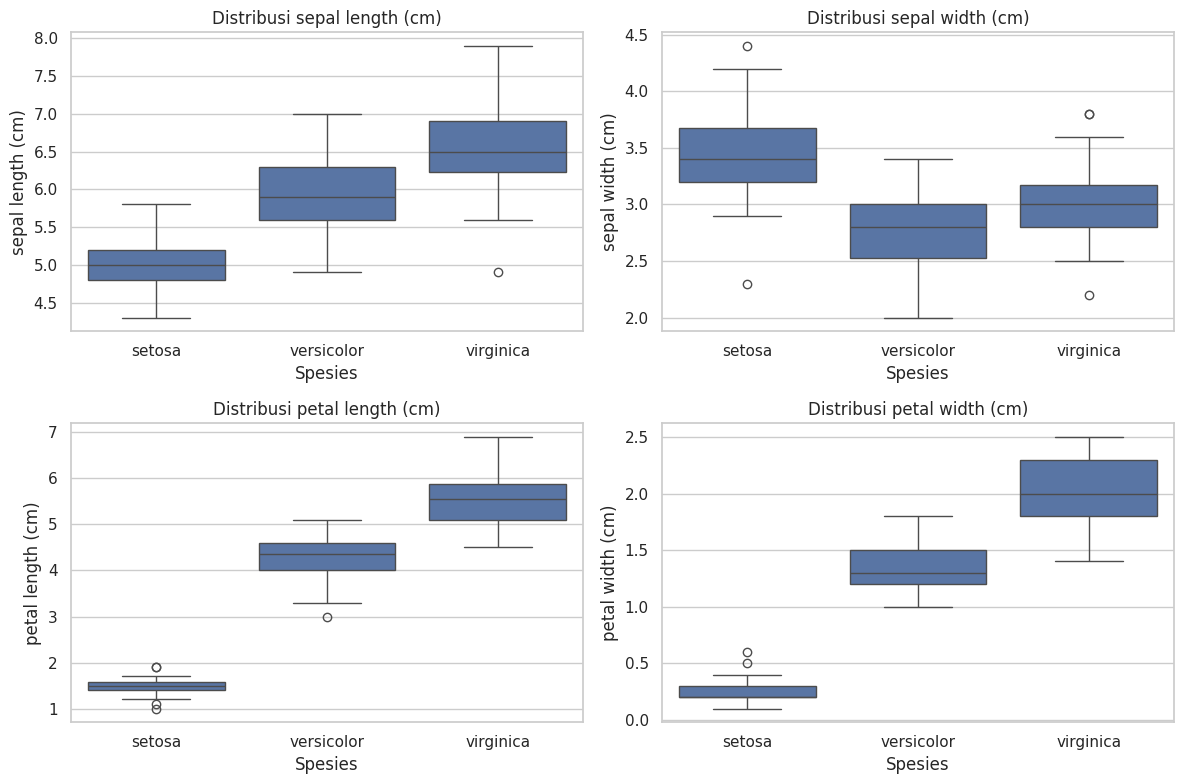

In [ ]:
# Langkah 2: Visualisasi hubungan dan distribusi fitur
# Pairplot buat lihat hubungan antar fitur berdasarkan spesies
sns.pairplot(df, hue='Spesies', diag_kind='hist')
plt.suptitle("Pairplot Fitur Dataset Iris berdasarkan Spesies", y=1.02)
plt.show()

# Boxplot buat lihat distribusi fitur tiap spesies
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Spesies', y=feature, data=df)
    plt.title(f"Distribusi {feature}")
plt.tight_layout()
plt.show()

In [ ]:
# Langkah 3: Cek outlier pakai metode IQR (versi lebih rapi)
def detect_outliers_all(df, columns):
    """
    Cek outlier untuk semua kolom sekaligus pakai IQR.

    Args:
        df (pd.DataFrame): DataFrame yang berisi data
        columns (list): Daftar nama kolom yang mau dicek

    Returns:
        dict: Kolom sebagai kunci, daftar outlier sebagai nilai
    """
    outliers_dict = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = outliers
    return outliers_dict

# Tampilkan outlier untuk tiap fitur
print("\nOutlier di Tiap Fitur (Catatan: Dataset Iris biasanya bersih, jadi outlier mungkin sedikit):")
outliers_all = detect_outliers_all(df, feature_names)
for feature, outliers in outliers_all.items():
    print(f"{feature}: {len(outliers)} outlier")
    if len(outliers) > 0:
        print(outliers)



Outlier di Tiap Fitur (Catatan: Dataset Iris biasanya bersih, jadi outlier mungkin sedikit):
sepal length (cm): 0 outlier
sepal width (cm): 4 outlier
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64
petal length (cm): 0 outlier
petal width (cm): 0 outlier



Matriks Korelasi:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


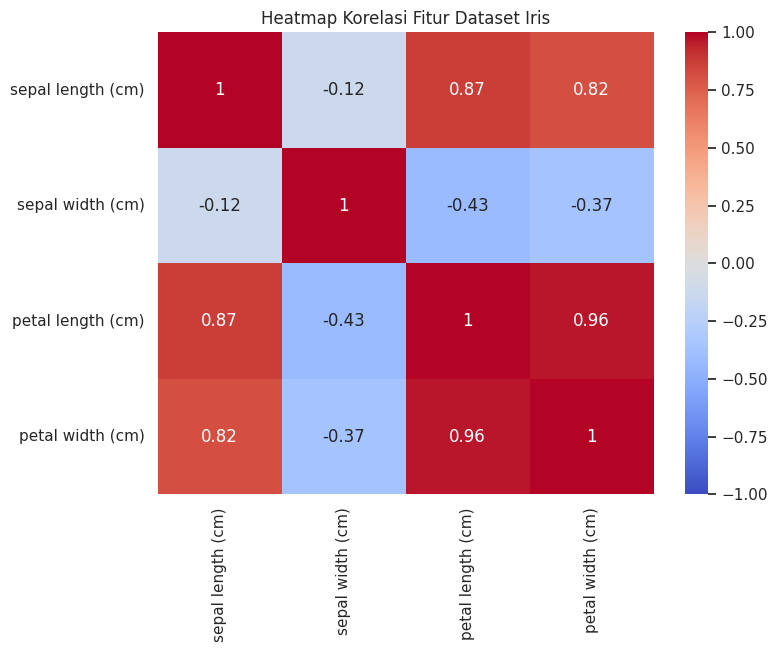


Pasangan Fitur dengan Korelasi Tertinggi:
petal length (cm)  petal width (cm)     0.962865
petal width (cm)   petal length (cm)    0.962865
dtype: float64
Catatan: Korelasi tinggi (misal, Petal Length dan Petal Width) menunjukkan fitur ini mirip.


In [ ]:
# Langkah 4: Hitung dan visualisasikan matriks korelasi
corr_matrix = df[feature_names].corr()
print("\nMatriks Korelasi:")
print(corr_matrix)

# Buat heatmap untuk matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Fitur Dataset Iris")
plt.show()

# Cari pasangan fitur yang paling berkorelasi
corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
print("\nPasangan Fitur dengan Korelasi Tertinggi:")
print(corr_pairs.head(2))
print("Catatan: Korelasi tinggi (misal, Petal Length dan Petal Width) menunjukkan fitur ini mirip.")


In [ ]:
# Langkah 5: Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData sudah distandarisasi (mean=0, varians=1) untuk K-Means.")


Data sudah distandarisasi (mean=0, varians=1) untuk K-Means.


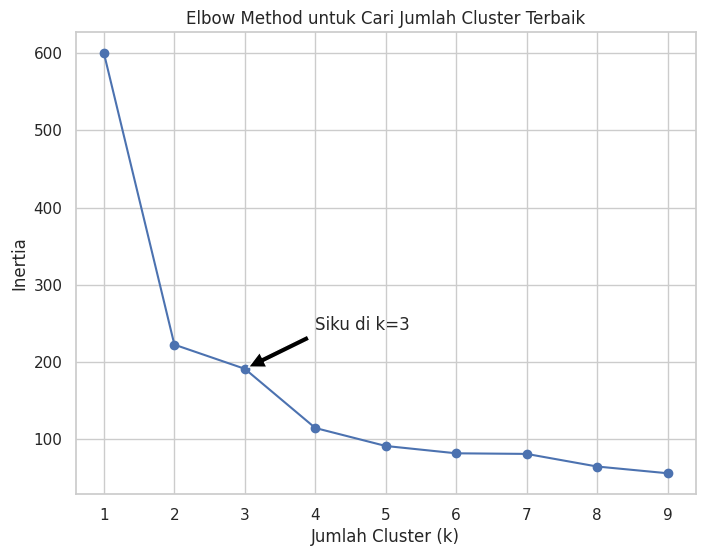

Dari Elbow Plot, k=3 kelihatan optimal, sesuai dengan 3 spesies di dataset Iris.


In [ ]:
# Langkah 6: Tentukan jumlah cluster optimal pakai Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Buat plot Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Cari Jumlah Cluster Terbaik')
plt.annotate('Siku di k=3', xy=(3, inertia[2]), xytext=(4, inertia[2]+50),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
print("Dari Elbow Plot, k=3 kelihatan optimal, sesuai dengan 3 spesies di dataset Iris.")

In [ ]:
# Langkah 7: Terapkan K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels
print("\n5 Baris Pertama DataFrame dengan Label Cluster:")
print(df.head())


5 Baris Pertama DataFrame dengan Label Cluster:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Spesies  Cluster  
0  setosa        1  
1  setosa        2  
2  setosa        2  
3  setosa        2  
4  setosa        1  


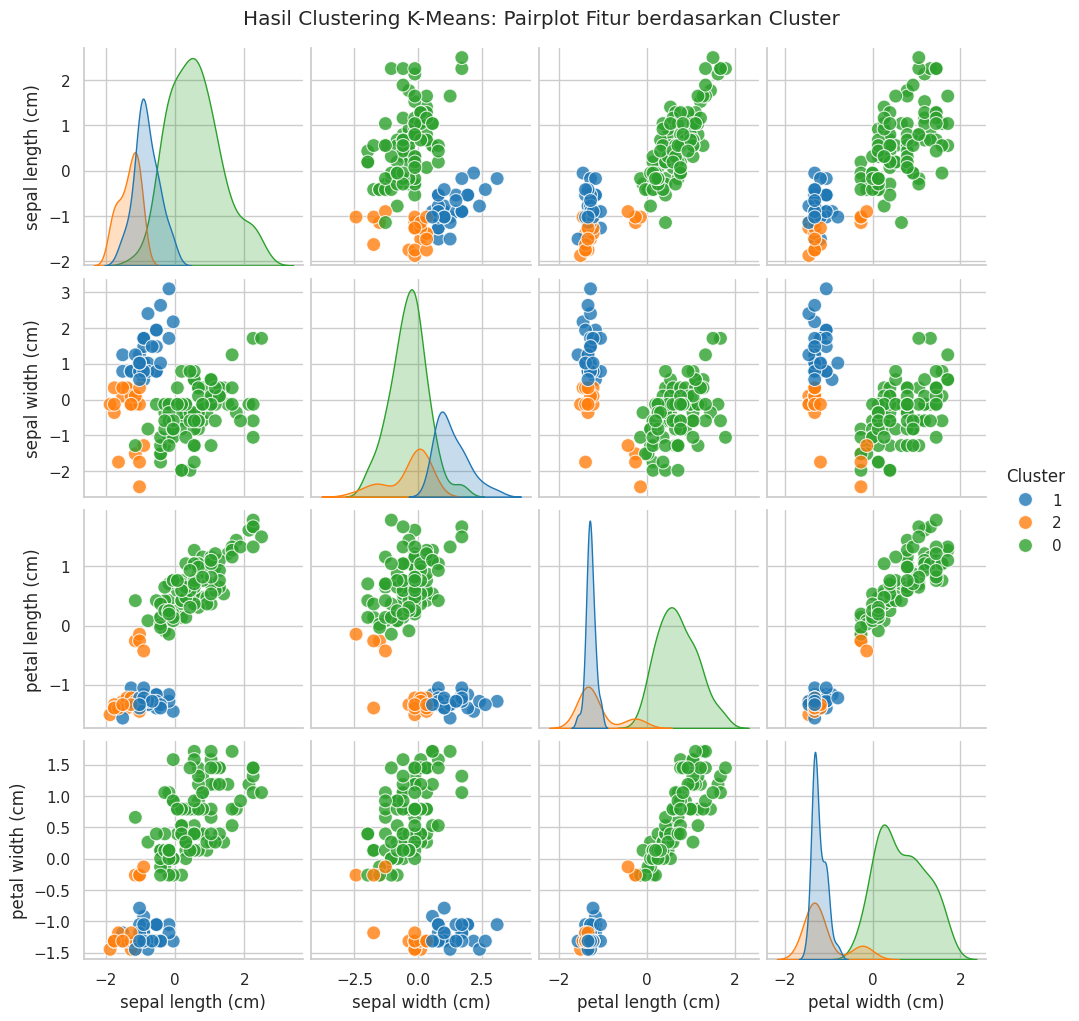

In [ ]:
# Langkah 8: Visualisasi cluster di ruang fitur asli
df_cluster = pd.DataFrame(X_scaled, columns=feature_names)
df_cluster['Cluster'] = labels.astype(str)
sns.pairplot(df_cluster, hue='Cluster', diag_kind='kde', palette='tab10',
             vars=feature_names, plot_kws={'s': 100, 'alpha': 0.8})
plt.suptitle('Hasil Clustering K-Means: Pairplot Fitur berdasarkan Cluster', y=1.02)
plt.show()

Varians yang Dijelaskan oleh PCA:
PC1: 0.7296, PC2: 0.2285
Total Varians yang Dijelaskan: 0.9581


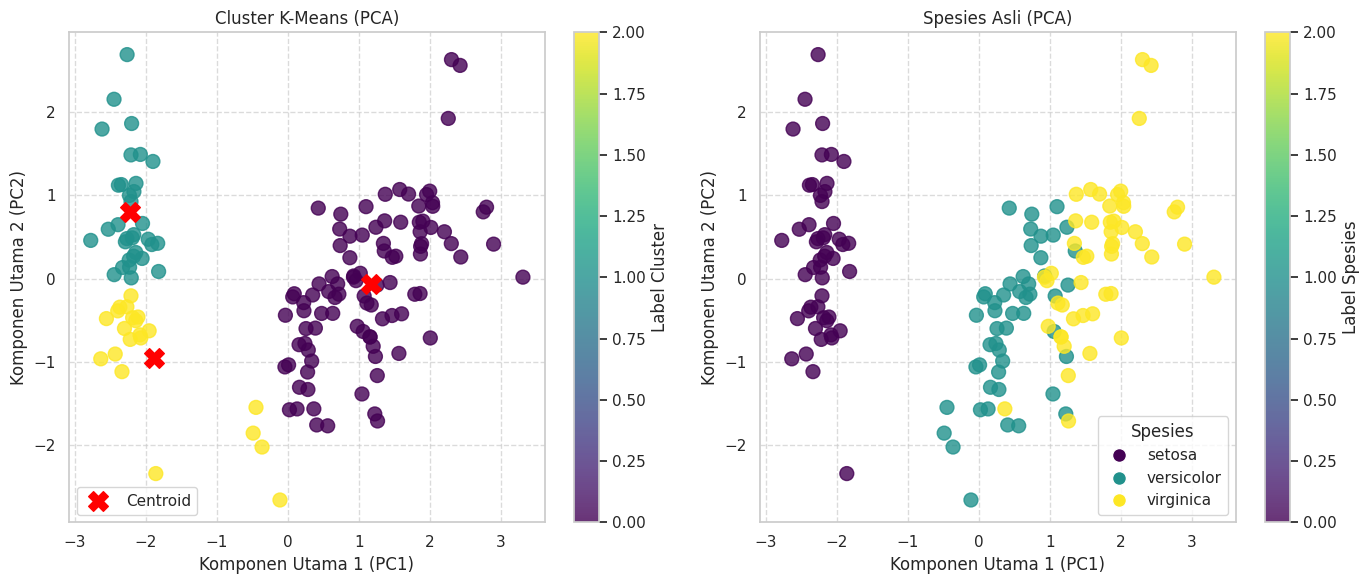

In [ ]:
# Langkah visualisasi dengan PCA (perbaikan untuk hilangkan warning)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled dari data yang sudah distandarisasi

# Tampilkan varians yang dijelaskan
print("Varians yang Dijelaskan oleh PCA:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}, PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total Varians yang Dijelaskan: {sum(pca.explained_variance_ratio_):.4f}")

# Buat plot
plt.figure(figsize=(14, 6))

# Subplot 1: Cluster K-Means
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=100, alpha=0.8)  # Pastikan cmap ada
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            s=200, c='red', marker='X', label='Centroid')
plt.xlabel('Komponen Utama 1 (PC1)')
plt.ylabel('Komponen Utama 2 (PC2)')
plt.title('Cluster K-Means (PCA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.colorbar(scatter1, label='Label Cluster')

# Subplot 2: Spesies Asli
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=100, alpha=0.8)  # Pastikan cmap ada
plt.xlabel('Komponen Utama 1 (PC1)')
plt.ylabel('Komponen Utama 2 (PC2)')
plt.title('Spesies Asli (PCA)')
plt.grid(True, linestyle='--', alpha=0.7)

# Perbaikan legenda untuk spesies (tanpa dummy scatter yang bikin warning)
colors = [plt.cm.viridis(i / 2) for i in range(len(target_names))]  # Ambil warna dari viridis
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=species)
           for i, species in enumerate(target_names)]
plt.legend(handles=handles, title='Spesies')
plt.colorbar(scatter2, label='Label Spesies')

plt.tight_layout()
plt.show()

In [ ]:
# Langkah 10: Evaluasi hasil clustering
# Tabulasi silang antara cluster dan spesies
df_eval = pd.DataFrame({'Cluster': labels, 'Spesies': [target_names[i] for i in y]})
crosstab = pd.crosstab(df_eval['Cluster'], df_eval['Spesies'])
print("\nTabulasi Silang (Cluster vs Spesies):")
print(crosstab)
print("Catatan: Cluster 0 kemungkinan besar adalah setosa, tapi ada sedikit tumpang tindih antara versicolor dan virginica.")

# Distribusi cluster
print("\nJumlah Sampel per Cluster:")
print(pd.Series(labels).value_counts())

# Fungsi untuk memetakan label cluster ke spesies
def map_labels(labels, true_labels):
    """
    Petakan label cluster ke spesies berdasarkan mayoritas.

    Args:
        labels (array): Label cluster dari K-Means
        true_labels (array): Label spesies asli

    Returns:
        array: Label yang sudah dipetakan ke spesies
    """
    mapped_labels = np.zeros_like(labels)
    unique_clusters = np.unique(labels)
    for i in unique_clusters:
        mask = (labels == i)
        if np.sum(mask) > 0:
            counts = np.bincount(true_labels[mask])
            mapped_labels[mask] = np.argmax(counts)
        else:
            print(f"Cluster {i} kosong, dilewati.")
    return mapped_labels

# Hitung akurasi
mapped_labels = map_labels(labels, y)
accuracy = np.mean(mapped_labels == y)
print(f"\nAkurasi Clustering (setelah pemetaan label): {accuracy:.4f}")

# Hitung Adjusted Rand Index
ari = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index: {ari:.4f}")

# Hitung Silhouette Score
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.4f}")
print("Catatan: Nilai Silhouette mendekati 1 artinya cluster terpisah dengan baik.")


Tabulasi Silang (Cluster vs Spesies):
Spesies  setosa  versicolor  virginica
Cluster                               
0             0          46         50
1            33           0          0
2            17           4          0
Catatan: Cluster 0 kemungkinan besar adalah setosa, tapi ada sedikit tumpang tindih antara versicolor dan virginica.

Jumlah Sampel per Cluster:
0    96
1    33
2    21
Name: count, dtype: int64

Akurasi Clustering (setelah pemetaan label): 0.6667
Adjusted Rand Index: 0.4328
Silhouette Score: 0.4799
Catatan: Nilai Silhouette mendekati 1 artinya cluster terpisah dengan baik.


In [ ]:
# Langkah 11: Ringkasan hasil
print("\nRingkasan Hasil Clustering:")
print("- K-Means dengan k=3 berhasil memisahkan setosa dengan baik, tapi ada sedikit tumpang tindih antara versicolor dan virginica.")
print("- Petal Length dan Petal Width punya korelasi tinggi, jadi fitur ini paling berpengaruh dalam clustering.")
print("- PCA menunjukkan PC1 dan PC2 menangkap sebagian besar varians, jadi visualisasi 2D cukup valid.")
print(f"- Metrik evaluasi: Akurasi={accuracy:.4f}, ARI={ari:.4f}, Silhouette Score={silhouette:.4f}")
print("Saran: Coba algoritma lain seperti DBSCAN untuk perbandingan.")


Ringkasan Hasil Clustering:
- K-Means dengan k=3 berhasil memisahkan setosa dengan baik, tapi ada sedikit tumpang tindih antara versicolor dan virginica.
- Petal Length dan Petal Width punya korelasi tinggi, jadi fitur ini paling berpengaruh dalam clustering.
- PCA menunjukkan PC1 dan PC2 menangkap sebagian besar varians, jadi visualisasi 2D cukup valid.
- Metrik evaluasi: Akurasi=0.6667, ARI=0.4328, Silhouette Score=0.4799
Saran: Coba algoritma lain seperti DBSCAN untuk perbandingan.


Note : Adanya tumpang tindih antara versicolor dan virginica adalah hal yang wajar, ini dikarenakan dua spesies ini memang sulit dipisahkan bedasarkan fitur yang ada (terlihat dari pairplot dan PCA). ini adalah salah satu cerminan dari sifat asli data